# Data visualization with Python
## 2 - Data with more than 2 dimensions
*Cleuton Sampaio*, [**DataLearningHub**](http://datalearninghub.com)
In this lesson, we'll look at how to provide visualizations with more than two dimensions of data. 

[![](../banner_livros2.png)](https://www.lcm.com.br/site/#livros/busca?term=cleuton)

## Three-dimensional dispersion
In cases where we have three measurable and, mainly, plotable characteristics (within the same scale - or we can adjust the scale), it is interesting to see a scatter plot so that we can visually assess the distribution of the samples. This is what we will see with the Matplotlib Toolkits library, especially MPlot3D, which has the Axes3D object for generating three-dimensional graphics.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D # Objects for 3D charts
%matplotlib inline
df = pd.read_csv('../datasets/evasao.csv') # School dropout data I collected
df.head()

periodo  bolsa  repetiu  ematraso  disciplinas  faltas  desempenho  \
0        2   0.25        8         1            4       0    0.000000   
1        2   0.15        3         1            3       6    5.333333   
2        4   0.10        0         1            1       0    8.000000   
3        4   0.20        8         1            1       0    4.000000   
4        1   0.20        3         1            1       1    8.000000   

   abandonou  
0          1  
1          0  
2          0  
3          1  
4          0

Some explanations. To start, let's look at the columns in this dataset:
- "periodo": Period the student is in;
- "bolsa": Percentage of scholarship that the student receives;
- "repetiu": Number of subjects in which the student failed;
- "ematraso": If the student is in arrears;
- "disciplinas": Disciplines that the student is currently taking;
- "desempenho": Academic average so far;
- "abandonou": Whether the student abandoned the course after the measurement or not.

In order to plot a chart, we need to reduce the number of dimensions, that is, the characteristics. I will do this in the most "naive" way possible, selecting three characteristics that most influenced the final result, that is, the student's abandonment (Churn).

In [4]:
df2 = df[['periodo','repetiu','desempenho']][df.abandonou == 1]
df2.head()

periodo  repetiu  desempenho
0         2        8         0.0
3         4        8         4.0
5         5        2         3.5
7         2        3         4.5
14        3        4         2.5

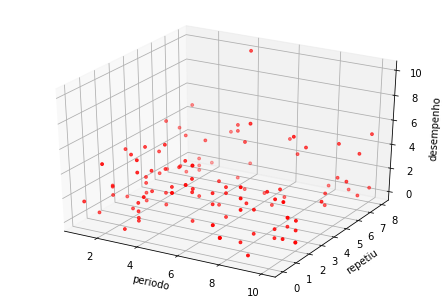

In [5]:
fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
ax = Axes3D(fig) # Para Matplotlib  0.99
ax.scatter(xs=df2['periodo'],ys=df2['repetiu'],zs=df2['desempenho'], c='r',s=8)
ax.set_xlabel('periodo')
ax.set_ylabel('repetiu')
ax.set_zlabel('desempenho')
plt.show()

I simply used Axes3D to obtain a three-dimensional chart object. The "scatter" method takes on three dimensions (xs, ys and zs), each assigned to one of the columns of the new dataframe. The "c" parameter is the color and the "s" is the size of each point. I informed the labels of each axis and that's it! We have a 3D graph showing the spatial distribution of dropouts, with respect to the three variables.

We can assess the data trend much better if we look at 3D visualizations. Let's look at a synthetic example. Let's generate some 3D values:

In [6]:
import numpy as np
np.random.seed(42)
X = np.linspace(1.5,3.0,num=100)
Y = np.array([x**4 + (np.random.rand()*6.5) for x in X])
Z = np.array([(X[i]*Y[i]) + (np.random.rand()*3.2) for i in range(0,100)])

First we'll see how this would look in 2D view:

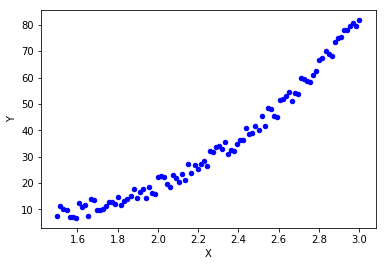

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X, Y, c='b', s=20)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

Ok ... Nothing much ... A positive non-linear correlation, right? But now, let's see this with the Z matrix included: 

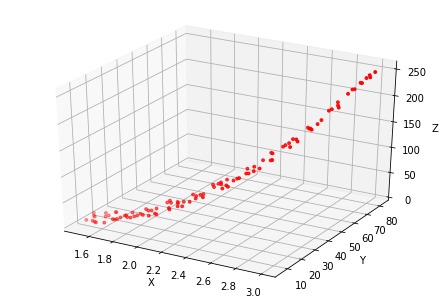

In [8]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c='r',s=8)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

And it gets more interesting when we overlay a prediction on the actual data. Let's use a Decision Tree Regressor to create a predictive model for this data:

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
features = pd.DataFrame({'X':X, 'Z':Z})
labels = pd.DataFrame({'Y':Y})
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=42)
dtr3d = DecisionTreeRegressor(max_depth=4, random_state=42)
dtr3d.fit(X_train,y_train)

print('R2',dtr3d.score(X_train,y_train))

R2 0.9976832045216716


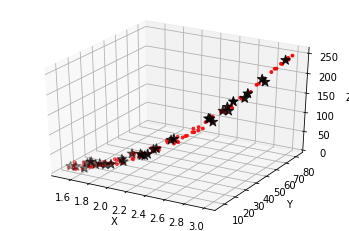

In [10]:
yhat3d = dtr3d.predict(X_test)

fig = plt.figure()
ax = ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, c='r',s=8)
ax.scatter(X_test['X'], yhat3d, X_test['Z'], c='k', marker='*',s=100)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

We plot the predictions using a star-type marker. It was very interesting, right?

## More than 3 dimensions

Sometimes we want to demonstrate information with more than 3 dimensions, but how do we do that? Let's assume that we also want to include the scholarship percentage as a variable in our example of school dropout. How would we do it?
One possible approach would be to manipulate the markers to represent the exchange. We can use colors, for example. Let's see, first, we need to know which stock ranges exist in the dataset:


In [11]:
print(df.groupby("bolsa").count())

       periodo  repetiu  ematraso  disciplinas  faltas  desempenho  abandonou
bolsa                                                                        
0.00        53       53        53           53      53          53         53
0.05        50       50        50           50      50          50         50
0.10        50       50        50           50      50          50         50
0.15        50       50        50           50      50          50         50
0.20        45       45        45           45      45          45         45
0.25        52       52        52           52      52          52         52


We can create a color table, indexed by the percentage of scholarship:

In [12]:
from decimal import Decimal
bolsas = {0.00: 'b',0.05: 'r', 0.10: 'g', 0.15: 'm', 0.20: 'y', 0.25: 'k'}
df['cor'] = [bolsas[float(round(Decimal(codigo),2))] for codigo in df['bolsa']]
df.head()

periodo  bolsa  repetiu  ematraso  disciplinas  faltas  desempenho  \
0        2   0.25        8         1            4       0    0.000000   
1        2   0.15        3         1            3       6    5.333333   
2        4   0.10        0         1            1       0    8.000000   
3        4   0.20        8         1            1       0    4.000000   
4        1   0.20        3         1            1       1    8.000000   

   abandonou cor  
0          1   k  
1          0   m  
2          0   g  
3          1   y  
4          0   y

This "trick" deserves an explanation. I created a dictionary indexed by the value of the scholarship. So, we get the corresponding color code. I just need to include a column in the dataframe with that value, in order to use it in the chart. There is only one problem: The original dataset is "dirty" (something that happens frequently) and the percentage 0.15 is like 0.1500000002. I can remove this by converting the speaker from "float" to "Decimal", rounding and converting again to float.

When plotting, let's look for the color in the dictionary: 

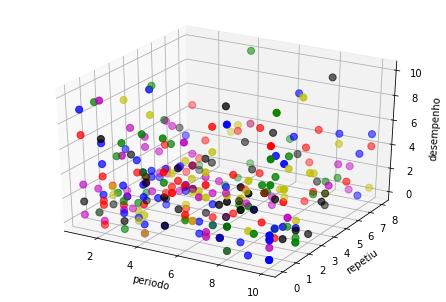

In [13]:
fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
ax = Axes3D(fig) # Para Matplotlib  0.99
ax.scatter(xs=df['periodo'],ys=df['repetiu'],zs=df['desempenho'], c=df['cor'],s=50)
ax.set_xlabel('periodo')
ax.set_ylabel('repetiu')
ax.set_zlabel('desempenho')
plt.show()

Ok! There we have the color of the ball giving the fourth dimension: The percentage of scholarship

We see that there is already a concentration of students with a 25% scholarship (black) with few repetitions, but low performance, in all periods.

Just as we touch the color, we can touch the size, creating something like a "heat map". We will transform this vision in 2D, placing "performance" in a different size.

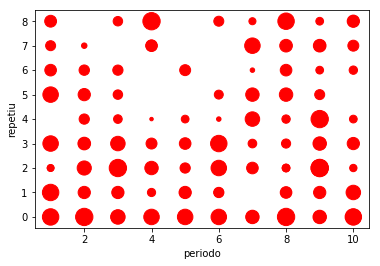

In [14]:
fig, ax = plt.subplots()
ax.scatter(df['periodo'],df['repetiu'], c='r',s=df['desempenho']*30)
ax.set_xlabel('periodo')
ax.set_ylabel('repetiu')
plt.show()

This shows us a curious fact. We have students with good performance (big balls) in all periods, without repeating any discipline, who left. What would have made them do this? Maybe it's financial conditions, or dissatisfaction with the course. A fact to be investigated, which was only revealed thanks to this visualization.

## Georeferencing
We often have datasets with geographic information and we need to plot the data on a map. I will show you here how to do this with an example of the dataset of the 2018 Dengue cases in Rio de Janeiro. Source: Data Rio: http://www.data.rio/datasets/fb9ede8d588f45b48b985e62c817f062_0

I created a georeferenced dataset, which is in the folder for this demo. It is in CSV format, separated by semicolons, with a decimal separator in Portuguese (comma) and field separator as ";"

In [15]:
df_dengue = pd.read_csv('./dengue2018.csv',decimal=',', sep=';')
df_dengue.head()

bairro  quantidade   latitude  longitude
0         Saúde           0 -22.897827 -43.197170
1        Gamboa           8 -22.900655 -43.206874
2  Santo Cristo          13 -22.876059 -43.234724
3          Caju          42 -22.900546 -43.186895
4        Centro          54 -22.919694 -43.202203

The columns are: "bairro": neighborhood, "quantidade": quantity of cases. The rest you know.
A simple scatter plot gives a good idea of the problem.  

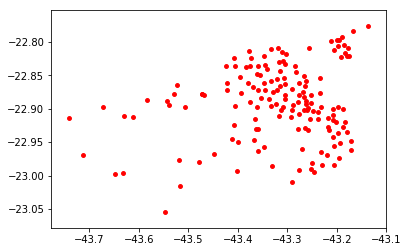

In [16]:
fig, ax = plt.subplots()
ax.scatter(df_dengue['longitude'],df_dengue['latitude'], c='r',s=15)
plt.show()

We can place the point size proportional to the number of cases, increasing the size of the information: 

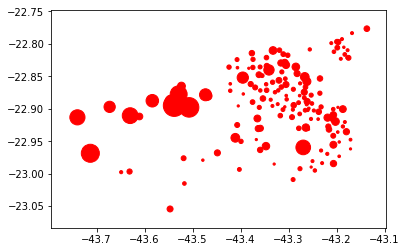

In [17]:
fig, ax = plt.subplots()
ax.scatter(df_dengue['longitude'],df_dengue['latitude'], c='r',s=5+df_dengue['quantidade'])
plt.show()

We can manipulate color and intensity to create a "heat map" of Dengue:

In [18]:
def calcular_cor(valor):
    cor = 'r'
    if valor <= 10: 
        cor = '#ffff00'
    elif valor <= 30:
        cor = '#ffbf00'
    elif valor <= 50:
        cor = '#ff8000'
    return cor
                
df_dengue['cor'] = [calcular_cor(codigo) for codigo in df_dengue['quantidade']]

In [19]:
df_dengue.head()

bairro  quantidade   latitude  longitude      cor
0         Saúde           0 -22.897827 -43.197170  #ffff00
1        Gamboa           8 -22.900655 -43.206874  #ffff00
2  Santo Cristo          13 -22.876059 -43.234724  #ffbf00
3          Caju          42 -22.900546 -43.186895  #ff8000
4        Centro          54 -22.919694 -43.202203        r

And we will classify the largest quantities to be last:

In [20]:
dfs = df_dengue.sort_values(['quantidade'])
dfs.head()

bairro  quantidade   latitude  longitude      cor
0                   Saúde           0 -22.897827 -43.197170  #ffff00
101  Cidade Universitária           0 -22.837634 -43.382897  #ffff00
30            São Conrado           0 -22.989818 -43.252920  #ffff00
21                   Urca           0 -22.961871 -43.170891  #ffff00
128                   Joá           0 -22.985191 -43.329977  #ffff00

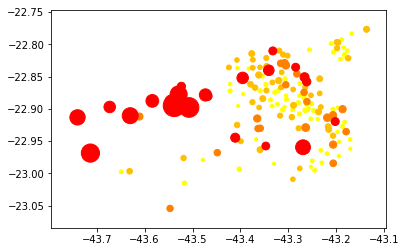

In [21]:
fig, ax = plt.subplots()
ax.scatter(dfs['longitude'],dfs['latitude'], c=dfs['cor'],s=10+dfs['quantidade'])
plt.show()

Ok! A heat map of Dengue in 2018. But something is missing right? Where's the map of Rio de Janeiro?
A lot of people use **geopandas** and download map files. I prefer to use Google Maps. It has an API called Static Maps that allows you to download maps. First, I will install **requests**:

In [69]:
!pip install requests

Now, a bit more "smart" part. I have the coordinates of the center of Rio de Janeiro (geographical center, not the city center). I will create a request to the API Static Map to download a map. You see, you have to register an API Key to use this API. I purposely omitted mine. Here you have instructions for this: https://developers.google.com/maps/documentation/maps-static/get-api-key

In [22]:
import requests
latitude  = -22.9137528
longitude = -43.526409
zoom = 10
size = 800
scale = 1
apikey = "**HERE TYPE YOUR API KEY**"
gmapas = "https://maps.googleapis.com/maps/api/staticmap?center=" + str(latitude) + "," + str(longitude) + \
    "&zoom=" + str(zoom) + \
    "&scale=" + str(scale) + \
    "&size=" + str(size) + "x" + str(size) + "&key=" + apikey
with open('mapa.jpg', 'wb') as handle:
        response = requests.get(gmapas, stream=True)

        if not response.ok:
            print(response)

        for block in response.iter_content(1024):
            if not block:
                break

            handle.write(block)


![](./mapa.jpg)

Well, the map was saved, now I need to know the coordinates of the limits. The Google API only allows you to enter the center (latitude and longitude) and the dimensions of the image in pixels. But, to adjust the map to the coordinates in latitudes and longitudes, you need to know the coordinates of the image rectangle. There are several examples of how to calculate this and I use a Javascript example that I converted to Python some time ago. This calculation is based on the script from: https://jsfiddle.net/1wy1mm7L/6/

In [23]:
import math
_C = { 'x': 128, 'y': 128 };
_J = 256 / 360;
_L = 256 / (2 * math.pi);

def tb(a):
    return 180 * a / math.pi


def sb(a):
    return a * math.pi / 180

def bounds(a, b, c):
    if b != None: 
        a = max(a,b)
    if c != None: 
        a = min(a,c)
    return a

def latlonToPt(ll):
    a = bounds(math.sin(sb(ll[0])), -(1 - 1E-15), 1 - 1E-15);
    return {'x': _C['x'] + ll[1] * _J,'y': _C['y'] + 0.5 * math.log((1 + a) / (1 - a)) * - _L}

def ptToLatlon(pt):
    return [tb(2 * math.atan(math.exp((pt['y'] - _C['y']) / -_L)) - math.pi / 2),(pt['x'] - _C['x']) / _J]

def calculateBbox(ll, zoom, sizeX, sizeY, scale):
    cp = latlonToPt(ll)
    pixelSize = math.pow(2, -(zoom + 1));
    pwX = sizeX*pixelSize;
    pwY = sizeY*pixelSize;
    return {'ne': ptToLatlon({'x': cp['x'] + pwX, 'y': cp['y'] - pwY}),'sw': ptToLatlon({'x': cp['x'] - pwX, 'y': cp['y'] + pwY})}

limites = calculateBbox([latitude,longitude],zoom, size, size, scale)
print(limites)


{'ne': [-22.406842952305475, -42.97709259375], 'sw': [-23.418774019100944, -44.07572540625]}


The function "calculateBbox" returns a dictionary containing the Northeast and Southwest points, with the latitude and longitude of each one.
To use this in matplotlib, I need to use the **imshow** method, except that I need to inform the scale, that is, what is the range of latitudes (vertical) and longitudes (horizontal) that the map represents. Thus, the plotting of points will be correct.
I will use the **mpimg** library to read the image file I just downloaded.
But the function **imshow** uses the coordinates in the attribute **extent** in the order: LEFT, RIGHT, DOWN, TOP. We have to organize the passing of the parameters to it.

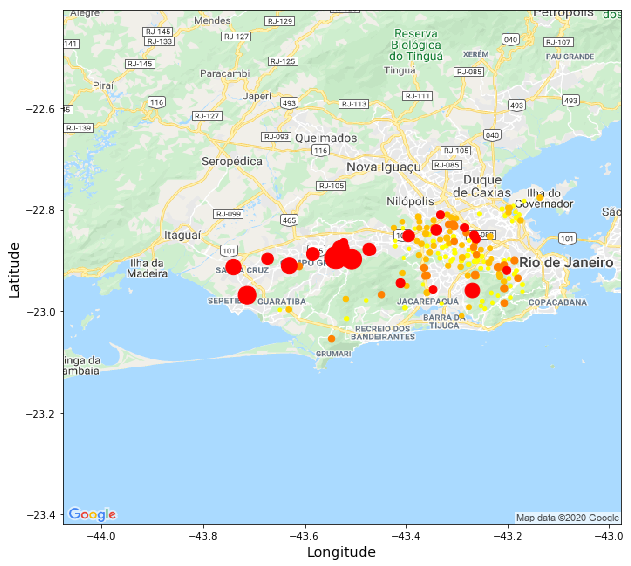

In [48]:
import matplotlib.image as mpimg
fig, ax = plt.subplots(figsize=(10, 10))
rio_mapa=mpimg.imread('./mapa.jpg')
plt.imshow(rio_mapa, extent=[limites['sw'][1],limites['ne'][1],limites['sw'][0],limites['ne'][0]], alpha=1.0)
ax.scatter(dfs['longitude'],dfs['latitude'], c=dfs['cor'],s=10+dfs['quantidade'])
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.show()

There you go! A georeferenced heat map of Dengue in 2018 in Rio de Janeiro